In [60]:
import pandas as pd
import numpy as np
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px

In [61]:
data_import=pd.read_csv('Data/2018-2010_import.csv')
data_export=pd.read_csv('Data/2018-2010_export.csv')

In [62]:
data_import.isnull()

HSCode  Commodity  value  country   year
0       False      False  False    False  False
1       False      False  False    False  False
2       False      False  False    False  False
3       False      False  False    False  False
4       False      False   True    False  False
...       ...        ...    ...      ...    ...
76119   False      False  False    False  False
76120   False      False  False    False  False
76121   False      False   True    False  False
76122   False      False   True    False  False
76123   False      False   True    False  False

[76124 rows x 5 columns]

In [63]:
data_export.isnull()

HSCode  Commodity  value  country   year
0        False      False  False    False  False
1        False      False  False    False  False
2        False      False  False    False  False
3        False      False  False    False  False
4        False      False  False    False  False
...        ...        ...    ...      ...    ...
137018   False      False  False    False  False
137019   False      False  False    False  False
137020   False      False  False    False  False
137021   False      False  False    False  False
137022   False      False  False    False  False

[137023 rows x 5 columns]

In [64]:
data_import['value'].fillna(data_import['value'].mean(), inplace=True)

In [65]:
data_export['value'].fillna(data_export['value'].mean(), inplace=True)

In [66]:
data_import.isnull().values.any()

False

In [67]:
data_export.isnull().values.any()

False

In [68]:
data_import['country'] = data_import['country'].replace({'U S A': 'USA'})
data_import = data_import.reset_index(drop=True)

In [69]:
data_export['country'] = data_export['country'].replace({'U S A': 'USA'})
data_export = data_export.reset_index(drop=True)

In [70]:
data_import['country'] = data_import['country'].replace({'U K': 'UK'})
data_import = data_import.reset_index(drop=True)

In [71]:
data_export['country'] = data_export['country'].replace({'U K': 'UK'})
data_import = data_import.reset_index(drop=True)

In [72]:
export_year = data_export.groupby('year').agg({'value': 'sum'})
export_year = export_year.rename(columns={'value': 'Export'})
import_year = data_import.groupby('year').agg({'value': 'sum'})
import_year = import_year.rename(columns={'value': 'Import'})

In [73]:
export_year['Growth Rate(E)'] = export_year.pct_change()
import_year['Growth Rate(I)'] = import_year.pct_change()

In [74]:
total_year = pd.concat([export_year, import_year], axis = 1)
total_year['Trade Deficit'] = export_year.Export - import_year.Import

In [75]:
print('Export/Import and Trade Balance of India')
display(total_year)
print('Descriptive statistics')
display(total_year.describe())

Export/Import and Trade Balance of India


Export  Growth Rate(E)         Import  Growth Rate(I)  \
year                                                                 
2010  284525.384958             NaN  434742.854789             NaN   
2011  338084.345458        0.188240  572127.782322        0.316014   
2012  334914.414495       -0.009376  586641.941559        0.025369   
2013  346869.760724        0.035697  533632.576571       -0.090361   
2014  346080.480757       -0.002275  525292.435502       -0.015629   
2015  296459.309228       -0.143380  500966.030566       -0.046310   
2016  309998.711399        0.045670  462052.625477       -0.077677   
2017  335320.398020        0.081683  539035.778581        0.166611   
2018  363035.850795        0.082654  592709.086851        0.099573   

      Trade Deficit  
year                 
2010 -150217.469831  
2011 -234043.436864  
2012 -251727.527064  
2013 -186762.815847  
2014 -179211.954745  
2015 -204506.721338  
2016 -152053.914077  
2017 -203715.380561  
2018 -229673.236056

Descriptive statistics


Export  Growth Rate(E)         Import  Growth Rate(I)  \
count       9.000000        8.000000       9.000000        8.000000   
mean   328365.406204        0.034864  527466.790246        0.047199   
std     25790.686054        0.095038   54208.483729        0.139872   
min    284525.384958       -0.143380  434742.854789       -0.090361   
25%    309998.711399       -0.004051  500966.030566       -0.054152   
50%    335320.398020        0.040684  533632.576571        0.004870   
75%    346080.480757        0.081926  572127.782322        0.116332   
max    363035.850795        0.188240  592709.086851        0.316014   

       Trade Deficit  
count       9.000000  
mean  -199101.384043  
std     35578.318392  
min   -251727.527064  
25%   -229673.236056  
50%   -203715.380561  
75%   -179211.954745  
max   -150217.469831

In [76]:
trace1 = go.Bar(
                x = total_year.index,
                y = total_year.Export,
                name = "Export",
                marker = dict(color = 'rgb(55, 83, 109)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Export)
# create trace2 
trace2 = go.Bar(
                x = total_year.index,
                y = total_year.Import,
                name = "Import",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Import)


layout = go.Layout(hovermode= 'closest', title = 'Export/Import of Indian Trade from 2010 to 2018' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

In [77]:
trace1 = go.Scatter(
                x = total_year.index,
                y = total_year['Growth Rate(E)'],
                name = "Growth Rate(E)",
                line_color='deepskyblue',
                opacity=0.8,
                text = total_year['Growth Rate(E)'])
# create trace2 
trace2 = go.Scatter(
                x = total_year.index,
                y = total_year['Growth Rate(I)'],
                name = "Growth Rate(I)",
                line_color='dimgray',
                opacity=0.8,
                text = total_year['Growth Rate(I)'])

layout = go.Layout(hovermode= 'closest', title = 'Export/Import Growth Rate of Indian Trade from 2010 to 2018' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Growth Rate'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

In [78]:
trace1 = go.Bar(
                x = total_year.index,
                y = total_year.Export,
                name = "Export",
                marker = dict(color = 'rgb(55, 83, 109)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Export)
# create trace2 
trace2 = go.Bar(
                x = total_year.index,
                y = total_year.Import,
                name = "Import",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Import)
# create trace3
trace3 = go.Bar(
                x = total_year.index,
                y = total_year['Trade Deficit'],
                name = "Trade Deficit",
                marker = dict(color = 'crimson',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year['Trade Deficit'])

layout = go.Layout(hovermode= 'closest', title = 'Export/Import and Trade Deficit of Indian Trade from 2010 to 2018' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data = [trace1, trace2, trace3], layout = layout)
fig.show()

In [79]:
'''Create pivot table of export/import (commodity wise)'''
exp_comm_table = pd.pivot_table(data_export, values = 'value', index = 'Commodity', columns = 'year')
imp_comm_table = pd.pivot_table(data_import, values = 'value', index = 'Commodity', columns = 'year')
print('**Commodity Composition of Exports**')
display(exp_comm_table.sample(n=5))
print('**Commodity Composition of Imports**')
display(imp_comm_table.sample(n=5))

**Commodity Composition of Exports**


year                                                     2010       2011  \
Commodity                                                                  
ZINC AND ARTICLES THEREOF.                          12.834076   9.950408   
FERTILISERS.                                         7.271354   6.539612   
RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; PR...  25.008446  21.247016   
COFFEE, TEA, MATE AND SPICES.                       14.437242  18.765842   
LIVE ANIMALS.                                       13.947528   6.844122   

year                                                     2012       2013  \
Commodity                                                                  
ZINC AND ARTICLES THEREOF.                           7.784493   8.787265   
FERTILISERS.                                         5.953152   5.445927   
RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; PR...  25.980711  24.563476   
COFFEE, TEA, MATE AND SPICES.                       16.873089  17.128858   
LIVE ANIMALS.                                        9.478547   7.591285   

year                                                     2014       2015  \
Commodity                                                                  
ZINC AND ARTICLES THEREOF.                           9.693512   9.448512   
FERTILISERS.                                         6.978951   4.766041   
RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; PR...  13.687637   8.352451   
COFFEE, TEA, MATE AND SPICES.                       17.849539  18.211930   
LIVE ANIMALS.                                       10.816560   6.159856   

year                                                     2016       2017  \
Commodity                                                                  
ZINC AND ARTICLES THEREOF.                           9.783146  11.758034   
FERTILISERS.                                         5.999453   5.691416   
RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; PR...  10.080593  11.836543   
COFFEE, TEA, MATE AND SPICES.                       18.515905  19.072076   
LIVE ANIMALS.                                        9.538315  16.925830   

year                                                     2018  
Commodity                                                      
ZINC AND ARTICLES THEREOF.                           9.235967  
FERTILISERS.                                         5.367322  
RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; PR...  14.581776  
COFFEE, TEA, MATE AND SPICES.                       18.676935  
LIVE ANIMALS.                                        8.376619

**Commodity Composition of Imports**


year                                                      2010        2011  \
Commodity                                                                    
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE...  108.414285  146.479399   
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...  162.858085  203.050067   
WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YAR...   12.449472   12.467442   
CERAMIC PRODUCTS.                                    12.382561   13.507312   
PRINTED BOOKDS, NEWSPAPERS, PICTURES AND OTHER ...   14.146389   16.270254   

year                                                      2012        2013  \
Commodity                                                                    
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE...  166.620865  140.008893   
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...  194.635210  174.131910   
WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YAR...   14.995732   11.150411   
CERAMIC PRODUCTS.                                    20.105227   16.500072   
PRINTED BOOKDS, NEWSPAPERS, PICTURES AND OTHER ...   14.361716   19.499974   

year                                                      2014        2015  \
Commodity                                                                    
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE...  161.699698  197.933306   
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...  177.068275  165.177643   
WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YAR...    8.790482   13.384898   
CERAMIC PRODUCTS.                                    19.062575   13.866267   
PRINTED BOOKDS, NEWSPAPERS, PICTURES AND OTHER ...    9.992016   12.122564   

year                                                      2016        2017  \
Commodity                                                                    
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE...  176.079714  180.319012   
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...  185.902527  211.528864   
WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YAR...   10.929171   12.418901   
CERAMIC PRODUCTS.                                    15.748105   17.549047   
PRINTED BOOKDS, NEWSPAPERS, PICTURES AND OTHER ...   13.685430   13.857509   

year                                                      2018  
Commodity                                                       
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE...  143.487220  
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...  232.084006  
WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YAR...   11.177359  
CERAMIC PRODUCTS.                                    17.386402  
PRINTED BOOKDS, NEWSPAPERS, PICTURES AND OTHER ...   17.059819

**Trend of the Most Exporting Goods(In Values) From 2010 to 2018**


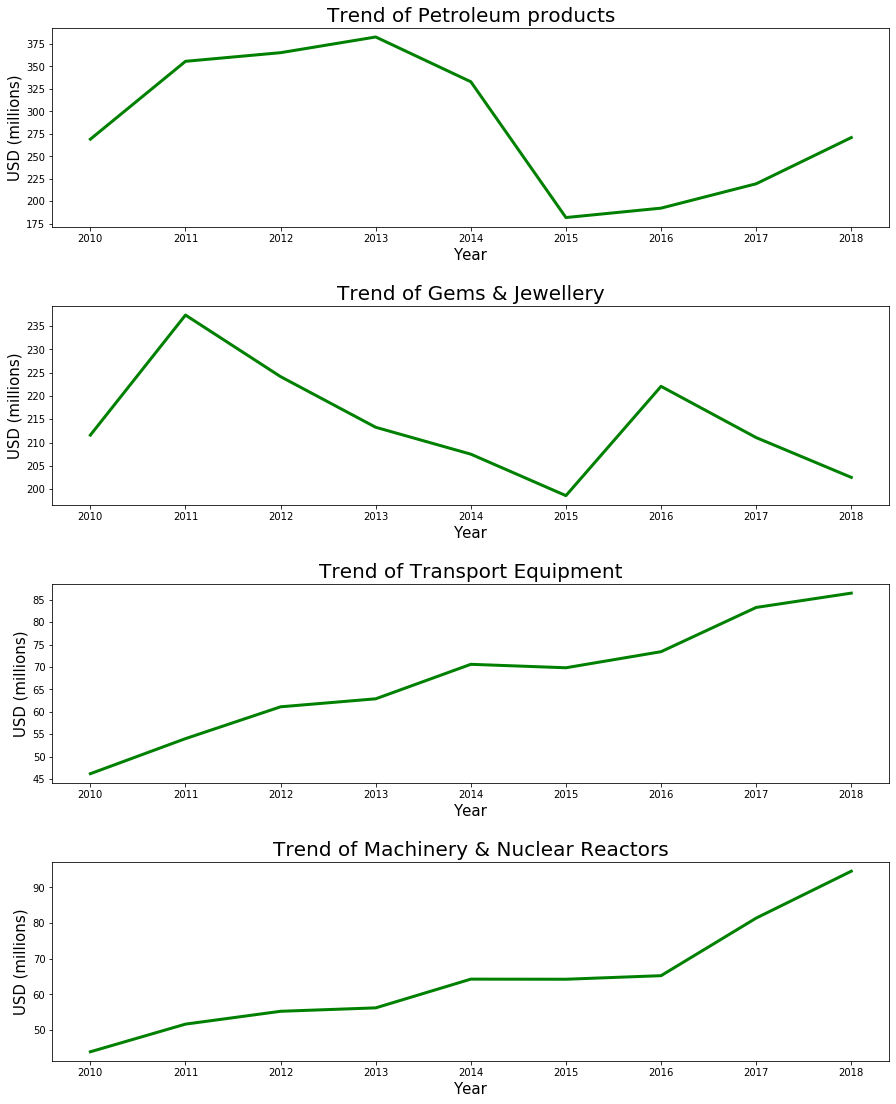

In [80]:
print('**Trend of the Most Exporting Goods(In Values) From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = exp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."].plot(color='green', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Petroleum products', size = 20)

plt.subplot(412)
g1 = exp_comm_table.loc["NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."].plot(color='green', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Gems & Jewellery', size = 20)

plt.subplot(413)
g2 = exp_comm_table.loc["VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF."].plot(color='green', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Transport Equipment', size = 20)


plt.subplot(414)
g3 = exp_comm_table.loc["NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF."].plot(color='green', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Machinery & Nuclear Reactors', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

**Trend of the Most Importing Goods(In Values) From 2010 to 2018**


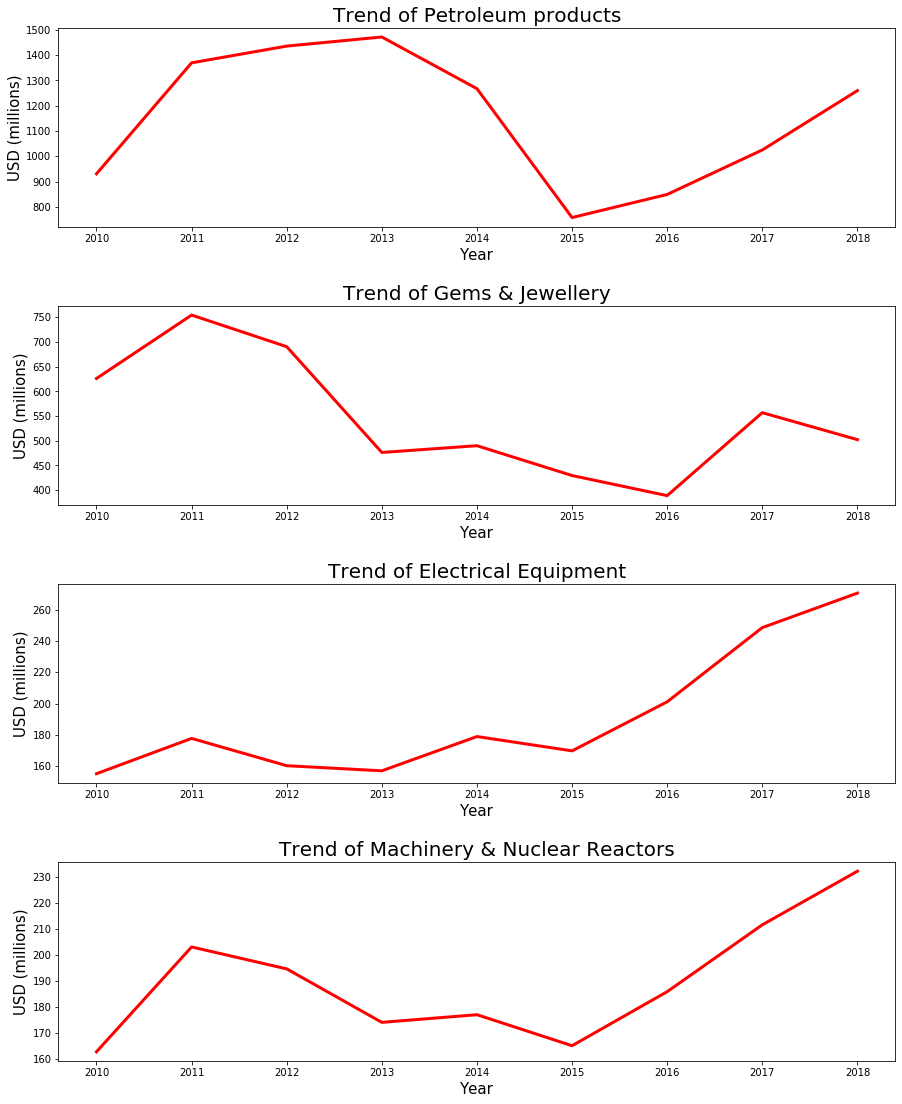

In [81]:
print('**Trend of the Most Importing Goods(In Values) From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = imp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."].plot(color='red', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Petroleum products', size = 20)

plt.subplot(412)
g1 = imp_comm_table.loc["NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."].plot(color='red', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Gems & Jewellery', size = 20)

plt.subplot(413)
g2 = imp_comm_table.loc["ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS."].plot(color='red', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Electrical Equipment', size = 20)


plt.subplot(414)
g3 = imp_comm_table.loc["NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF."].plot(color='red', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Machinery & Nuclear Reactors', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

In [82]:
'''Coverting dataset in Country wise'''
exp_country = data_export.groupby('country').agg({'value':'sum'})
exp_country = exp_country.rename(columns={'value': 'Export'})
exp_country = exp_country.sort_values(by = 'Export', ascending = False)
exp_country = exp_country[:20]

imp_country = data_import.groupby('country').agg({'value':'sum'})
imp_country = imp_country.rename(columns={'value': 'Import'})
imp_country = imp_country.sort_values(by = 'Import', ascending = False)
imp_country = imp_country[:20]

In [83]:
'''Calculating trade deficit'''
total_country = pd.concat([exp_country, imp_country], axis = 1)
total_country['Trade Deficit'] = exp_country.Export - imp_country.Import
total_country = total_country.sort_values(by = 'Trade Deficit', ascending = False)
total_country = total_country[:11]

print('**Direction of Foreign Trade Export/Import and Trade Balance of India**')
display(total_country)
print('**Descriptive statistics**')
display(total_country.describe())

**Direction of Foreign Trade Export/Import and Trade Balance of India**


Export         Import  Trade Deficit
USA          360738.976975  219588.467125  141150.509850
U ARAB EMTS  289374.880000  257969.838473   31405.041527
HONG KONG    116361.952704   85912.474148   30449.478556
SINGAPORE    101916.946121   76664.487048   25252.459072
BELGIUM       54572.999217   92645.955573  -38072.956356
MALAYSIA      43528.674804   85389.408499  -41860.733695
JAPAN         48361.345729   97501.334199  -49139.988469
GERMANY       69071.128292  120225.892824  -51154.764533
INDONESIA     42644.900071  129910.519898  -87265.619828
SAUDI ARAB    66297.939608  246356.819720 -180058.880112
CHINA P RP   122323.627900  532489.317125 -410165.689225

**Descriptive statistics**


Export         Import  Trade Deficit
count      11.000000      11.000000      11.000000
mean   119563.033766  176786.774057  -57223.740292
std    106634.310469  136082.853161  142464.128915
min     42644.900071   76664.487048 -410165.689225
25%     51467.172473   89279.214860  -69210.192180
50%     69071.128292  120225.892824  -41860.733695
75%    119342.790302  232972.643423   27850.968814
max    360738.976975  532489.317125  141150.509850

In [84]:
'''Visualization of Export/Import and Trade Deficit'''
trace1 = go.Bar(
                x = total_country.index,
                y = total_country.Export,
                name = "Export",
                marker = dict(color = 'rgb(55, 83, 109)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Export)
# create trace2 
trace2 = go.Bar(
                x = total_country.index,
                y = total_country.Import,
                name = "Import",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Import)
# create trace3
trace3 = go.Bar(
                x = total_country.index,
                y = total_country['Trade Deficit'],
                name = "Trade Deficit",
                marker = dict(color = 'crimson',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year['Trade Deficit'])

layout = go.Layout(hovermode= 'closest', title = 'Export/Import and Trade Deficit of Indian Trade from 2010 to 2018(Country Wise)' , xaxis = dict(title = 'Country'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data = [trace1, trace2, trace3], layout = layout)
fig.show()

In [85]:
'''Create pivot table of export/import (country wise)'''
exp_country_table = pd.pivot_table(data_export, values = 'value', index = 'country', columns = 'year')
imp_country_table = pd.pivot_table(data_import, values = 'value', index = 'country', columns = 'year')
print('**Direction of Foreign Trade Export in India**')
display(exp_country_table.sample(n=5))
print('**Direction of Foreign Trade Import in India**')
display(imp_country_table.sample(n=5))

**Direction of Foreign Trade Export in India**


year               2010       2011       2012       2013       2014  \
country                                                               
VIRGIN IS US   5.943044   4.131820   9.716958   4.297659   6.915318   
SLOVENIA       4.890903   4.399592   5.312769   4.375359   4.979317   
OMAN          12.429163  13.915158  27.183607  29.657665  24.973151   
NEUTRAL ZONE        NaN   3.092547  21.567829        NaN        NaN   
SAMOA          4.919187   5.306229   8.137936   2.587180   3.742068   

year               2015       2016       2017       2018  
country                                                   
VIRGIN IS US   9.004988   7.825036  10.065537   6.132920  
SLOVENIA       6.372365   4.909205   5.058428   6.738870  
OMAN          22.574876  28.497893  24.890408  23.358935  
NEUTRAL ZONE        NaN        NaN        NaN        NaN  
SAMOA          6.728138   5.936378   4.250870   6.820884

**Direction of Foreign Trade Import in India**


year             2010        2011        2012        2013        2014  \
country                                                                 
KUWAIT     155.355469  254.598823  287.271334  315.161904  267.446375   
FAROE IS.   38.888855   41.587617   62.361425   31.180712   41.597617   
ARMENIA     21.257808   19.661208   17.141298   26.125594   19.735713   
GABON       37.882697   18.535793   34.880476   59.682970   57.916428   
MACAO       29.115332   14.453406   17.075389   32.533141   31.307935   

year             2015        2016        2017        2018  
country                                                    
KUWAIT     105.629742  101.403241  144.614555  143.381984  
FAROE IS.    0.020000   20.787142   41.577617   20.797142  
ARMENIA     37.507897   20.875475   18.379243   20.837142  
GABON       25.252029   22.428066   37.931512   50.257968  
MACAO       21.247697   18.100050   40.242512    3.812857

Trend of the Direction of Foreign Trade Export in India From 2010 to 2018


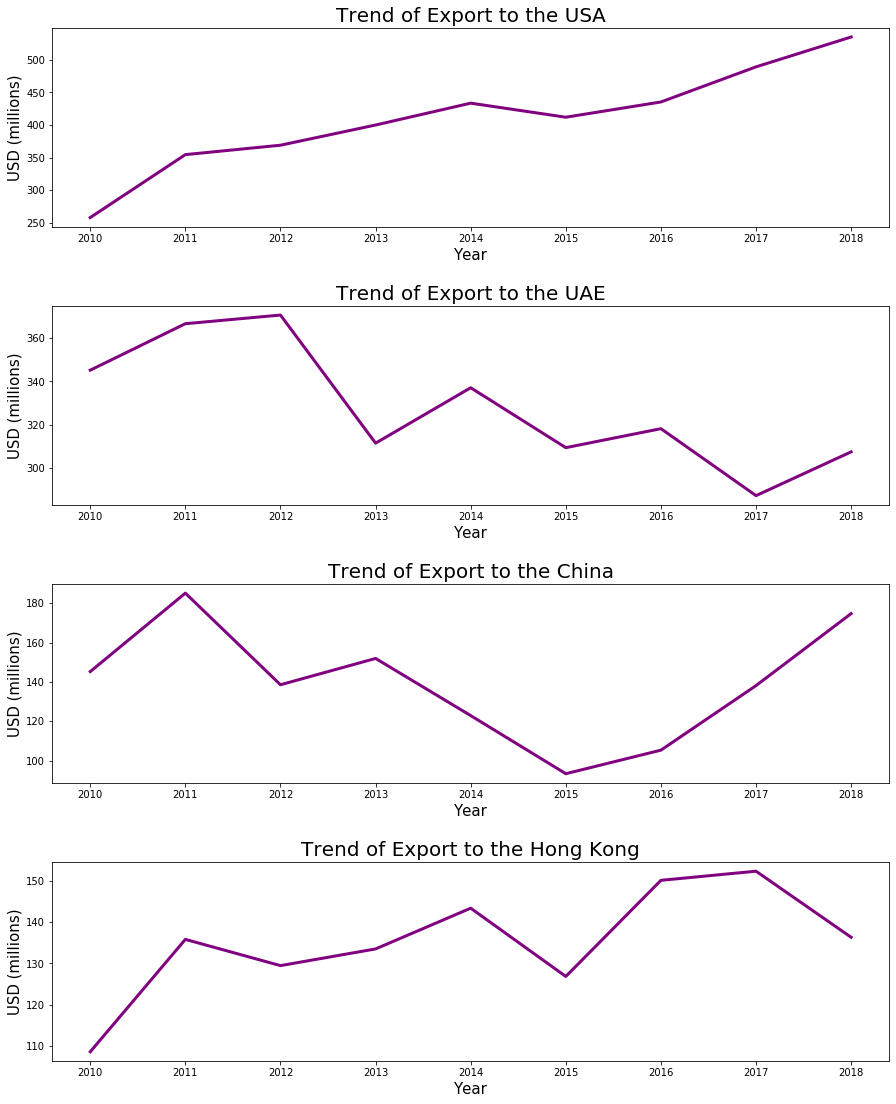

In [86]:
print('Trend of the Direction of Foreign Trade Export in India From 2010 to 2018')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = exp_country_table.loc["USA"].plot(color='purple', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Export to the USA', size = 20)

plt.subplot(412)
g1 = exp_country_table.loc["U ARAB EMTS"].plot(color='purple', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Export to the UAE', size = 20)

plt.subplot(413)
g2 = exp_country_table.loc["CHINA P RP"].plot(color='purple', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Export to the China', size = 20)


plt.subplot(414)
g3 = exp_country_table.loc["HONG KONG"].plot(color='purple', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Export to the Hong Kong', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

**Trend of the Direction of Foreign Trade Import in India From 2010 to 2018**


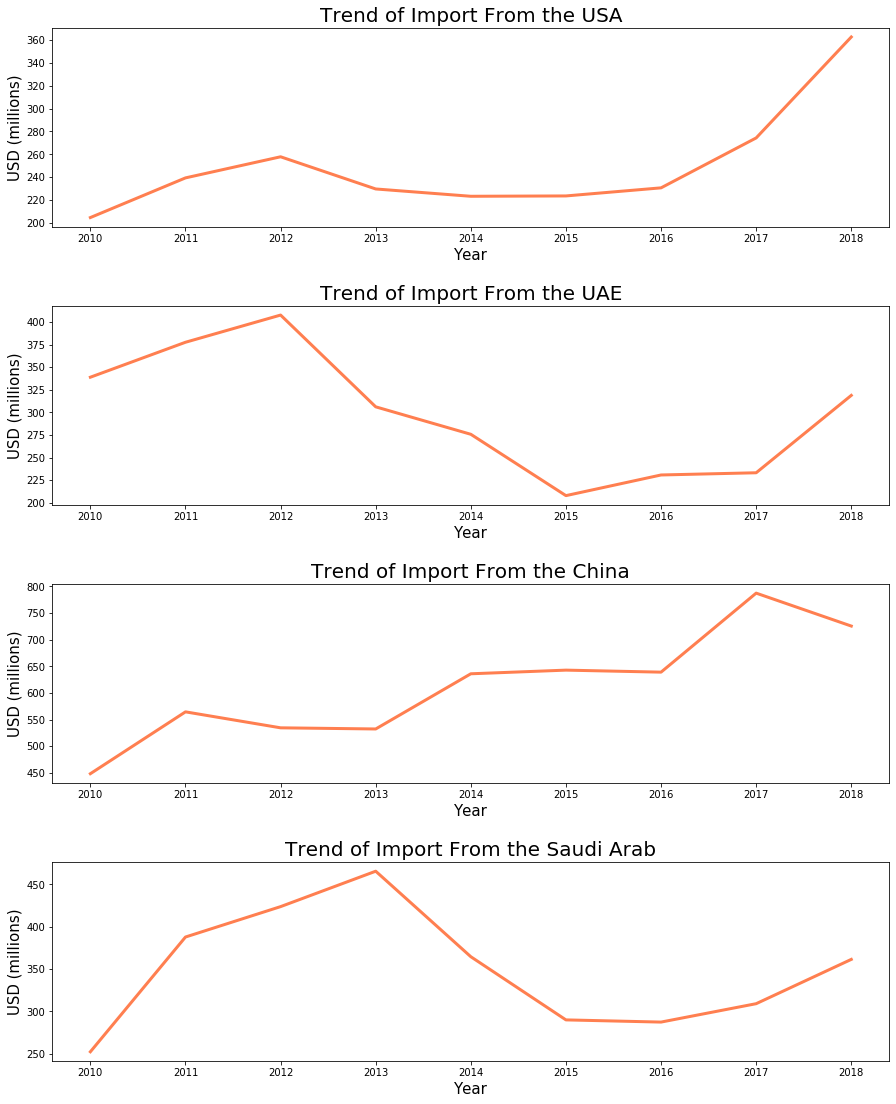

In [87]:
print('**Trend of the Direction of Foreign Trade Import in India From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = imp_country_table.loc["USA"].plot(color='coral', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Import From the USA', size = 20)

plt.subplot(412)
g1 = imp_country_table.loc["U ARAB EMTS"].plot(color='coral', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Import From the UAE', size = 20)

plt.subplot(413)
g2 = imp_country_table.loc["CHINA P RP"].plot(color='coral', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Import From the China', size = 20)


plt.subplot(414)
g3 = imp_country_table.loc["SAUDI ARAB"].plot(color='coral', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Import From the Saudi Arab', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

In [88]:
import warnings
warnings.filterwarnings('ignore')

export_map = pd.DataFrame(data_export.groupby(['country'])['value'].sum().reset_index())
count = pd.DataFrame(export_map.groupby('country')['value'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = px.colors.diverging.BrBG,
            locationmode = 'country names',
            locations = count['country'],
            text = count['country'],
            z = count['value'],
            reversescale=True)]

layout = go.Layout(title = 'India Export to Other Country')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)


In [89]:
import_map = pd.DataFrame(data_import.groupby(['country'])['value'].sum().reset_index())
count = pd.DataFrame(import_map.groupby('country')['value'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'algae',
            locationmode = 'country names',
            locations = count['country'],
            text = count['country'],
            z = count['value'],
            reversescale=True)]

layout = go.Layout(title = 'India Import from Other Country')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)